In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fifa_historical_file = './data/fifa_worldcup_matches.csv'
fifa_fixture_file = './data/fifa_worldcup_fixture.csv'
fifa_missing_file = './data/fifa_worldcup_missing_data.csv'

df_fix = pd.read_csv(fifa_fixture_file)
df_historical = pd.read_csv(fifa_historical_file)
df_missing = pd.read_csv(fifa_missing_file)

In [3]:
df_fix

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
...,...,...,...,...
59,Winners Match 51,Match 59,Winners Match 52,2022
60,Winners Match 57,Match 61,Winners Match 58,2022
61,Winners Match 59,Match 62,Winners Match 60,2022
62,Losers Match 61,Match 63,Losers Match 62,2022


In [4]:
df_historical

,home,score,away,year
0,France,4–1,Mexico,1930
1,Argentina,1–0,France,1930
2,Chile,3–0,Mexico,1930
3,Chile,1–0,France,1930
4,Argentina,6–3,Mexico,1930
...,...,...,...,...
452,Russia,2–2 (a.e.t.),Croatia,2018
453,France,1–0,Belgium,2018
454,Croatia,2–1 (a.e.t.),England,2018
455,Belgium,2–0,England,2018


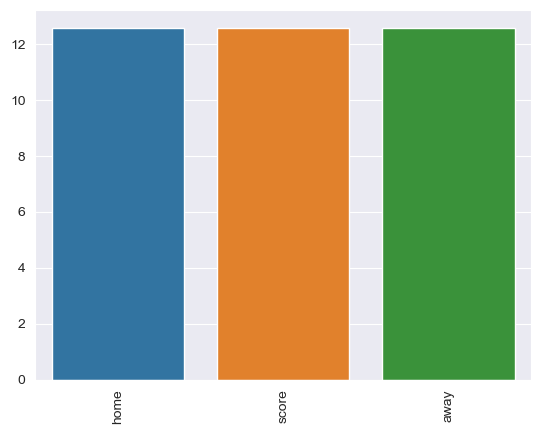

In [5]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return(percent_nan)

percent_nan = percent_missing(df_missing)

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.show()


<h1> Cleaning df_fixture </h1> 

In [6]:
df_fix['home'] = df_fix['home'].str.strip()
df_fix['away'] = df_fix['away'].str.strip()
df_fix

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
...,...,...,...,...
59,Winners Match 51,Match 59,Winners Match 52,2022
60,Winners Match 57,Match 61,Winners Match 58,2022
61,Winners Match 59,Match 62,Winners Match 60,2022
62,Losers Match 61,Match 63,Losers Match 62,2022


<h1> Cleaning df_missing_data and adding to df_historical </h1>

In [7]:
#Droping missing data, concatenate, delete duplicates and sorting by year
df_missing.dropna(inplace=True)
df_historical = pd.concat([df_historical, df_missing], ignore_index=True)
df_historical.drop_duplicates(inplace=True)
df_historical.sort_values('year',inplace=True)
df_historical

,home,score,away,year
0,France,4–1,Mexico,1930
17,Uruguay,4–2,Argentina,1930
16,Uruguay,6–1,Yugoslavia,1930
15,Argentina,6–1,United States,1930
14,Paraguay,1–0,Belgium,1930
...,...,...,...,...
419,Brazil,2–0,Costa Rica,2018
420,Serbia,1–2,Switzerland,2018
421,Serbia,0–2,Brazil,2018
408,France,1–0,Peru,2018


<h1> Cleaning df_historical data </h1>

In [8]:
# deleting match with walk over
delete_index = df_historical[df_historical['home'].str.contains('Sweden') &
                             df_historical['away'].str.contains('Austria')].index

df_historical.drop(index=delete_index, inplace=True)

# cleanning score and home/away columns
df_historical['score'] = df_historical['score'].str.replace('[^\d–]', '', regex=True)
df_historical['home'] = df_historical['home'].str.strip() # clean blank spaces: Yugoslavia twice
df_historical['away'] = df_historical['away'].str.strip()

# splitting score columns into home and away goals and dropping score column
df_historical[['HomeGoals', 'AwayGoals']] = df_historical['score'].str.split('–', expand=True)
df_historical.drop('score', axis=1, inplace=True)

# renaming columns and changing data types
df_historical.rename(columns={'home': 'HomeTeam', 'away': 'AwayTeam',
                                   'year':'Year'}, inplace=True)
df_historical = df_historical.astype({'HomeGoals': int, 'AwayGoals':int, 'Year': int})

# creating new column "totalgoals"
df_historical['TotalGoals'] = df_historical['HomeGoals'] + df_historical['AwayGoals']
df_historical

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
17,Uruguay,Argentina,1930,4,2,6
16,Uruguay,Yugoslavia,1930,6,1,7
15,Argentina,United States,1930,6,1,7
14,Paraguay,Belgium,1930,1,0,1
...,...,...,...,...,...,...
419,Brazil,Costa Rica,2018,2,0,2
420,Serbia,Switzerland,2018,1,2,3
421,Serbia,Brazil,2018,0,2,2
408,France,Peru,2018,1,0,1


<h2> Exportar dataframes limpios </h2>

In [9]:
df_historical.to_csv('clean_fifa_worldcup_matches.csv',index = False)
df_fix.to_csv('clean_fifa_worldcup_fixtures.csv',index = False)